# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science 



## Homework 6: Multilayer Feedforward Network - Dealing with Missing Data


**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the [instructions given in canvas](https://canvas.harvard.edu/courses/42693/pages/homework-policies-and-submission-instructions).

- This homework can be submitted in pairs.

- If you submit individually but you have worked with someone, please include the name of your **one** partner below. 


**Names of person you have worked with goes here:**
<br><BR>

In [2]:
%matplotlib inline
import numpy as np
import numpy.random as nd
import pandas as pd
import math
import matplotlib.pyplot as plt

import os
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import display



<div class="theme"> Overview </div>

In this homework, you are free to explore different ways of solving the problems -within the restrictions of the questions. Your solutions should read like a report with figures to support your statements. Please include your code cells as usual but augment your solutions with written answers. We will also check for code readability and efficiency as we feel you have some experience now. In particular, for Q1, we expect you to write appropriate functions, such as your code can be generalized beyond the specified network architectures of his homework.

For this homework you may **not** use a machine learning library such as `keras` or `tensorflow` to build and fit the network. The objective is to build the network equations from scratch.

- Q1 explores approximating a function using a **Multilayer Feedforward Network** with one input layer, one hidden layer, and one output layer. 

- Q2 deals with missing data in a medical dataset.

<div class="exercise"> <b> Question 1: Construct a feed forward neural network [50 pts]</b> </div>
    
In this part of the homework you are to construct three feed forward neural networks consisting of an input layer, one hidden layer with 1, 2 and 4 nodes respectively, and an output layer.  The hidden layer uses the sigmoid as the activation function and use a linear  output node. 
You should code the equations from scratch. 

You are given three datasets containing ($x,y$) points where $y=f(x)$:

- In the first dataset, $f(x)$ is a **single step** function (data in`data/step_df.csv`), 
- In the second dataset, $f(x)$ is a **one hump** function (data in `data/one_hump_df.csv`),
- In the third dataset, $f(x)$ is a **two equal humps** function (data in `data/two_hump_df.csv`).

**1.1** Create a plot of each dataset and explore the structure of the data. 

**1.2**  Give values to the weights **manually**, perform a forward pass using the data for the **single step** function and a hidden layer of **one** node, and plot the output from the network, in the same plot as the true $y$ values. Adjust the weigths (again manualy) until the plots match as closely as possible.

**1.3** Do the same for the **one hump** function data, this time using a hidden layer consisting of **two** nodes.

**1.4** Do the same for the **two hump** function data but this time increase the number of hidden nodes to **four**.  

**1.5** Choose the appropriate loss function and calculate and report the loss from all three cases. Derive the gradient of the output layer's weights for all three cases (step, one hump and two humps). Use the weights for the hidden layers you found in the previous question and perform gradient descent on the weights of this layer (output layer). What is the optimised weight value and loss you obtained? How many steps did you take to reach this value? What is the threshold value you used to stop? 

### Answers

**1.1** 

In [3]:
# your code here
step_df = pd.read_csv('data/step_df.csv')
one_hump_df = pd.read_csv('data/one_hump_df.csv')
two_hump_df = pd.read_csv('data/two_hump_df.csv')
display(one_hump_df.head())

,x,y
0,3.734197,1.000226
1,6.890217,-0.000877
2,3.330365,0.999072
3,-4.250132,-0.000071
4,3.700311,1.002423


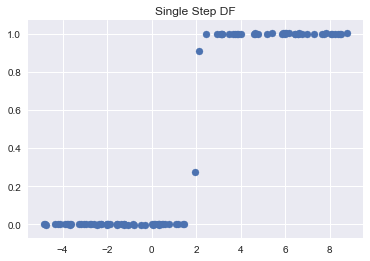

In [4]:
plt.scatter(step_df['x'],step_df['y'])
plt.title("Single Step DF");

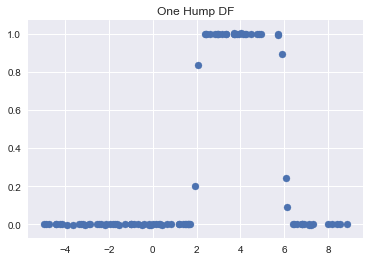

In [5]:
plt.scatter(one_hump_df['x'],one_hump_df['y'])
plt.title("One Hump DF");

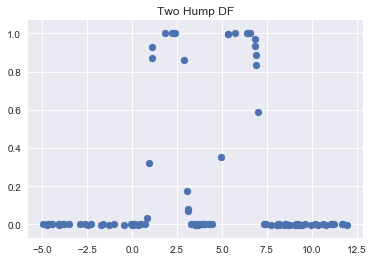

In [6]:
plt.scatter(two_hump_df['x'],two_hump_df['y'])
plt.title("Two Hump DF");

**1.2** Give values to the weights **manually**, perform a forward pass using the data for the **single step** function and a hidden layer of **one** node, and plot the output from the network, in the same plot as the true $y$ values. Adjust the weigths (again manualy) until the plots match as closely as possible.

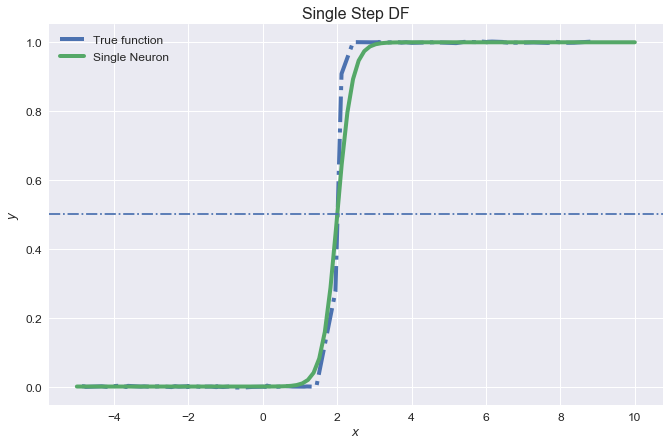

In [7]:
# your code here
def affine(x, w, b):
    return w * x + b

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

x = np.linspace(-5.0, 10.0, 100) # input points
sorted_step_df = step_df.sort_values('x') # data

w = 5.0
b = -10

y_step = sigmoid(affine(x, w, b))

# Plot
fig, ax = plt.subplots(1,1, figsize=(11,7))
ax.plot(sorted_step_df['x'],sorted_step_df['y'], ls='-.', lw=4, label='True function')
ax.plot(x, y_step, lw=4, label=r'Single Neuron')
ax.axhline(y=0.5, linestyle='-.')
# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=12) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=12)
ax.set_title('Single Step DF', fontsize = 16)
ax.legend(fontsize = 12, loc = 2)

ax.tick_params(labelsize=12) # Make the tick labels big enough to read


**1.3** Do the same for the **one hump** function data, this time using a hidden layer consisting of **two** nodes.

In [8]:
x = np.linspace(-5.0, 10.0, 100) # input points
sorted_one_hump_df = one_hump_df.sort_values('x') # data

# Set weights
w = np.array([-20, -20])
b = np.array([40, 120])

# Affine transformations
z1 = w[0] * x + b[0]
z2 = w[1] * x + b[1]

# Node outputs
h1 = 1.0 / (1.0 + np.exp(-z1))
h2 = 1.0 / (1.0 + np.exp(-z2))

# Network output
wout = np.array([-1, 1])
bout = np.array(0)

y_one = wout[0] * h1 + wout[1] * h2 + bout

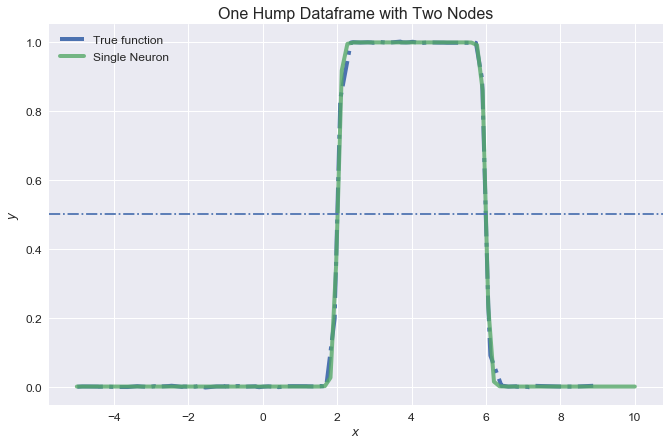

In [9]:
# Plot
fig, ax = plt.subplots(1,1, figsize=(11,7))
ax.plot(sorted_one_hump_df['x'],sorted_one_hump_df['y'], ls='-.', lw=4, label='True function')
ax.plot(x, y_one, lw=4, label=r'Single Neuron', alpha = 0.8)
ax.axhline(y=0.5, linestyle='-.')
# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=12) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=12)
ax.set_title('One Hump Dataframe with Two Nodes', fontsize = 16)
ax.legend(fontsize = 12, loc = 2)

ax.tick_params(labelsize=12) # Make the tick labels big enough to read

**1.4**

In [10]:
x = np.linspace(-5.0, 10.0, 100) # input points
sorted_two_hump_df = two_hump_df.sort_values('x') # data

# Set weights
w = [-20, -20, -20, -20]
b = [20, 60, 100, 140]

# Affine transformations
z1 = w[0] * x + b[0]
z2 = w[1] * x + b[1]
z3 = w[2] * x + b[2]
z4 = w[3] * x + b[3]

# Node outputs
h1 = 1.0 / (1.0 + np.exp(-z1))
h2 = 1.0 / (1.0 + np.exp(-z2))
h3 = 1.0 / (1.0 + np.exp(-z3))
h4 = 1.0 / (1.0 + np.exp(-z4))

# Network output
wout = [-1, 1, -1 , 1]
bout = [0]

y_two = wout[0] * h1 + wout[1] * h2 + wout[2] * h3 + wout[3] * h4 + bout

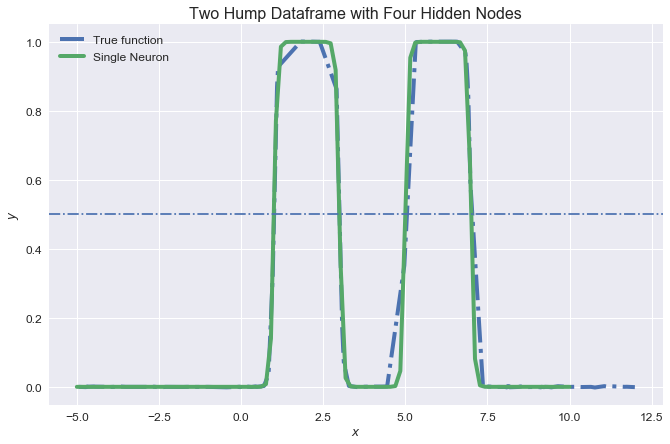

In [11]:
fig, ax = plt.subplots(1,1, figsize=(11,7))
ax.plot(sorted_two_hump_df['x'],sorted_two_hump_df['y'], ls='-.', lw=4, label='True function')
ax.plot(x, y_two, lw=4, label=r'Single Neuron')
ax.axhline(y=0.5, linestyle='-.')
# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=12) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=12)
ax.set_title('Two Hump Dataframe with Four Hidden Nodes', fontsize = 16)
ax.legend(fontsize = 12, loc = 2)

ax.tick_params(labelsize=12) # Make the tick labels big enough to read

**1.5** Choose the appropriate loss function and calculate and report the loss from all three cases. Derive the gradient of the output layer's weights for all three cases (step, one hump and two humps). Use the weights for the hidden layers you found in the previous question and perform gradient descent on the weights of this layer (output layer). What is the optimised weight value and loss you obtained? How many steps did you take to reach this value? What is the threshold value you used to stop? 

Print MSE for each of the three cases

In [14]:
# your code here
MSE_step = mean_squared_error(step_df['y'].values, y_step)
MSE_one = mean_squared_error(one_hump_df['y'].values, y_one)
MSE_two = mean_squared_error(two_hump_df['y'].values, y_two)

print("MSE for the single step data: ",MSE_step)
print("MSE for the one hump data: ", MSE_one)
print("MSE for the two hump data: ",MSE_two)

MSE for the single step data:  0.5212282026118956
MSE for the one hump data:  0.45762761768005944
MSE for the two hump data:  0.3048771896664801


*Calculate the partial derivative of MSE and place into a function*

$E(w) = \frac{1}{n}\sum_{i=1}^{n}(h_w(x_i)-y_i)^2$  
  
$\frac{dE(w)}{dw_j} = \frac{1}{n}\sum_{i=1}^{n}2(h_w(x_i)-y_i)h'_w(x_i)$
  
$\frac{dE(w)}{dw_j} = \frac{2}{n}\sum_{i=1}^{n}2(w_j(x_{ij})-y_i)x_{ij}$

We will set out threshold value equal to $10e^{-10}$

In [28]:
def MSEgrad(X,Y, start_value, w_i, b_i, eta = 1e-6, thresh = 10e-10):
    run = True
    cost = 1
    step = 0
    w_n = start_value[:-1]
    b_n = start_value[-1];
    try:
        n = len(w_i)
    except:
        n = 1
    
    #Manipulate the dataframes in order to run them through the loop as arrays    
    X = np.array(X); w_i = np.reshape(np.array(w_i),(n,1))
    w_n = np.reshape(np.array(w_n), (n,1))
    b_i = np.array([b_i]*100).T
    Y = np.reshape(np.array(Y), (1,-1))
    y_i = np.dot(w_i, np.reshape(X,(1,-1))) + b_i
    hw = 1.0/(1.0+np.exp(-y_i))
    hw = np.reshape(np.array(hw), (n, -1))
    
    #Run loss function
    while run:
        prev = cost
        w_n = w_n - eta*np.sum((np.dot(w_n.T, hw)-Y)*hw)
        y_new = np.dot(w_n.T, hw) + b_n
        cost = mean_squared_error(Y, y_new)
        step = step +1
        if abs(prev-cost) < thresh:
            run = False
    return w_n, step, cost

In [27]:
w_n_step, step_step, cost_step = MSEgrad(step_df['x'], step_df['y'], start_value = [-1.0001, 0.999], w_i = [-20], b_i = [40])
print("Single step coefficients:", w_n_step)
print("Number of steps:", step_step)
print("Cost:", cost_step)

Single step coefficients: [[-0.99902099]]
Number of steps: 19
Cost: 1.83546084213659e-06


In [26]:
w_n_one, step_one, cost_one = MSEgrad(one_hump_df['x'], one_hump_df['y'], start_value = [-1.0001, 0.999, 0.0], w_i = [-20, -20], b_i = [40, 120])
print("One hump coefficients:",w_n_one)
print("One hump steps:", step_one)
print("Cost:",cost_one)

One hump coefficients: [[-1.00009971]
 [ 0.99900029]]
One hump steps: 2
Cost: 2.1474757062995616e-06


In [25]:
w_n_two, step_two, cost_two = MSEgrad(two_hump_df['x'], two_hump_df['y'], start_value = [-1.0001, 0.999, -1.001, 0.999, 0], w_i = [-20, -20, -20, -20], b_i = [40, 60, 100, 140])
print("Two hump coefficients:" ,w_n_two)
print("Two hump steps:", step_two)
print("Cost:" ,cost_two)

Two hump coefficients: [[-0.98129359]
 [ 1.01780641]
 [-0.98219359]
 [ 1.01780641]]
Two hump steps: 5943
Cost: 0.024452033257127335


### Answers

**2.1** 

In [ ]:
# your code here


**2.2** 

In [ ]:
# your code here


**2.3** 

In [ ]:
# your code here


**2.4** 

In [ ]:
# your code here


**2.5** 

*your answer here*


**2.6** 